In [1]:
# Import the dependecies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000,90.000,size=1500)
lngs = np.random.uniform(-180.000,180.000,size=1500)
lat_lngs = zip(lats,lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [6]:
# Import dependencies
import requests
from config import weather_api_key

In [7]:
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | ginir
Processing Record 3 of Set 1 | beringovskiy
Processing Record 4 of Set 1 | bur gabo
City not found. Skipping...
Processing Record 5 of Set 1 | necochea
Processing Record 6 of Set 1 | slidell
Processing Record 7 of Set 1 | kieta
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | forestville
Processing Record 10 of Set 1 | provideniya
Processing Record 11 of Set 1 | cairns
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | fomboni
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | lhuntshi
City not found. Skipping...
Processing Record 18 of Set 1 | carndonagh
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | conde
Processing Record 22 of Set 1 | ponta

Processing Record 38 of Set 4 | lamar
Processing Record 39 of Set 4 | arraial do cabo
Processing Record 40 of Set 4 | khatanga
Processing Record 41 of Set 4 | daoukro
Processing Record 42 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 43 of Set 4 | osinovo
Processing Record 44 of Set 4 | san ramon
Processing Record 45 of Set 4 | saleaula
City not found. Skipping...
Processing Record 46 of Set 4 | vostok
Processing Record 47 of Set 4 | port lincoln
Processing Record 48 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 49 of Set 4 | butaritari
Processing Record 50 of Set 4 | glasgow
Processing Record 1 of Set 5 | solnechnyy
Processing Record 2 of Set 5 | flin flon
Processing Record 3 of Set 5 | grand forks
Processing Record 4 of Set 5 | la union
Processing Record 5 of Set 5 | tuggurt
City not found. Skipping...
Processing Record 6 of Set 5 | alugan
Processing Record 7 of Set 5 | hatsukaichi
Processing Record 8 of Set 5 | pemberton
Processing Reco

City not found. Skipping...
Processing Record 25 of Set 8 | wagga wagga
Processing Record 26 of Set 8 | jumla
Processing Record 27 of Set 8 | galesong
Processing Record 28 of Set 8 | cabot
Processing Record 29 of Set 8 | tezu
Processing Record 30 of Set 8 | vestmanna
Processing Record 31 of Set 8 | havre-saint-pierre
Processing Record 32 of Set 8 | santa maria da boa vista
Processing Record 33 of Set 8 | aguimes
Processing Record 34 of Set 8 | lagoa
Processing Record 35 of Set 8 | changde
Processing Record 36 of Set 8 | nargana
Processing Record 37 of Set 8 | maloshuyka
City not found. Skipping...
Processing Record 38 of Set 8 | joshimath
Processing Record 39 of Set 8 | progreso
Processing Record 40 of Set 8 | khutar
Processing Record 41 of Set 8 | karamay
City not found. Skipping...
Processing Record 42 of Set 8 | mahbubabad
Processing Record 43 of Set 8 | kautokeino
Processing Record 44 of Set 8 | san buenaventura
Processing Record 45 of Set 8 | gorontalo
Processing Record 46 of Set 

Processing Record 14 of Set 12 | alakurtti
Processing Record 15 of Set 12 | nadym
Processing Record 16 of Set 12 | sangueya
Processing Record 17 of Set 12 | hami
Processing Record 18 of Set 12 | celestun
Processing Record 19 of Set 12 | kangaatsiaq
Processing Record 20 of Set 12 | evensk
Processing Record 21 of Set 12 | linqing
Processing Record 22 of Set 12 | groa
Processing Record 23 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 24 of Set 12 | stornoway
Processing Record 25 of Set 12 | takoradi
Processing Record 26 of Set 12 | polyarnyy
Processing Record 27 of Set 12 | vila franca do campo
Processing Record 28 of Set 12 | guerrero negro
Processing Record 29 of Set 12 | cherskiy
Processing Record 30 of Set 12 | chino valley
Processing Record 31 of Set 12 | avera
Processing Record 32 of Set 12 | sorong
Processing Record 33 of Set 12 | maniitsoq
Processing Record 34 of Set 12 | mut
Processing Record 35 of Set 12 | pasni
Processing Record 36 of Set 12 | barabai
Proce

In [10]:
len(city_data)

539

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,54.72,76,71,5.75,ZA,2021-09-23 22:51:44
1,Ginir,7.1333,40.7000,61.43,73,58,4.47,ET,2021-09-23 22:51:44
2,Beringovskiy,63.0500,179.3167,36.41,82,100,15.28,RU,2021-09-23 22:51:45
3,Necochea,-38.5473,-58.7368,55.04,93,38,8.79,AR,2021-09-23 22:51:46
4,Slidell,30.2752,-89.7812,78.87,46,1,1.99,US,2021-09-23 22:50:40
5,Kieta,-6.2167,155.6333,83.08,69,100,2.75,PG,2021-09-23 22:51:47
6,Barrow,71.2906,-156.7887,26.62,86,90,5.75,US,2021-09-23 22:51:48
7,Forestville,38.8451,-76.8750,70.66,68,75,1.99,US,2021-09-23 22:51:49
8,Provideniya,64.3833,-173.3000,33.91,69,90,8.95,RU,2021-09-23 22:51:50
9,Cairns,-16.9167,145.7667,78.12,68,41,11.50,AU,2021-09-23 22:49:13


In [12]:
# Reorder the columns
new_columns = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_columns]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2021-09-23 22:51:44,-34.5322,20.0403,54.72,76,71,5.75
1,Ginir,ET,2021-09-23 22:51:44,7.1333,40.7000,61.43,73,58,4.47
2,Beringovskiy,RU,2021-09-23 22:51:45,63.0500,179.3167,36.41,82,100,15.28
3,Necochea,AR,2021-09-23 22:51:46,-38.5473,-58.7368,55.04,93,38,8.79
4,Slidell,US,2021-09-23 22:50:40,30.2752,-89.7812,78.87,46,1,1.99
5,Kieta,PG,2021-09-23 22:51:47,-6.2167,155.6333,83.08,69,100,2.75
6,Barrow,US,2021-09-23 22:51:48,71.2906,-156.7887,26.62,86,90,5.75
7,Forestville,US,2021-09-23 22:51:49,38.8451,-76.8750,70.66,68,75,1.99
8,Provideniya,RU,2021-09-23 22:51:50,64.3833,-173.3000,33.91,69,90,8.95
9,Cairns,AU,2021-09-23 22:49:13,-16.9167,145.7667,78.12,68,41,11.50


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

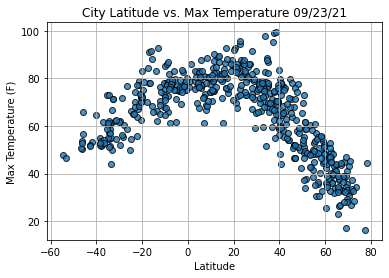

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

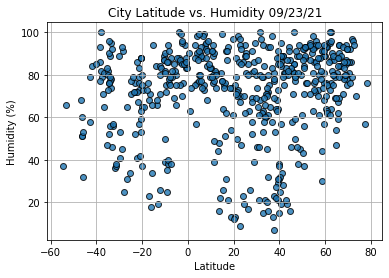

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

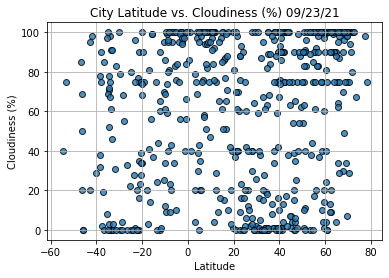

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

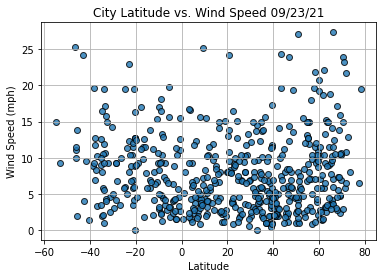

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                      Fomboni
Country                        KM
Date          2021-09-23 22:51:52
Lat                        -12.28
Lng                       43.7425
Max Temp                    76.39
Humidity                       80
Cloudiness                      0
Wind Speed                  11.21
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
534     True
535     True
536     True
537    False
538     True
Name: Lat, Length: 539, dtype: bool

In [22]:
city_data_df.loc[city_data_df["Lat"] >= 0].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ginir,ET,2021-09-23 22:51:44,7.1333,40.7000,61.43,73,58,4.47
2,Beringovskiy,RU,2021-09-23 22:51:45,63.0500,179.3167,36.41,82,100,15.28
4,Slidell,US,2021-09-23 22:50:40,30.2752,-89.7812,78.87,46,1,1.99
6,Barrow,US,2021-09-23 22:51:48,71.2906,-156.7887,26.62,86,90,5.75
7,Forestville,US,2021-09-23 22:51:49,38.8451,-76.8750,70.66,68,75,1.99


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

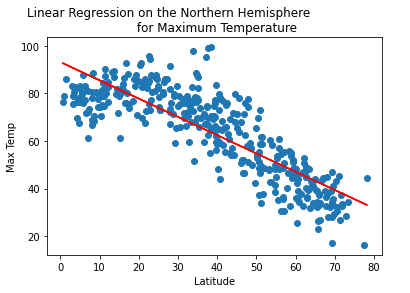

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                        \n for Maximum Temperature','Max Temp',(10,270))


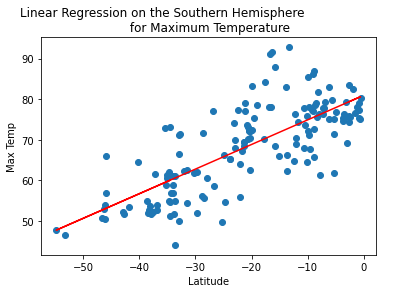

In [25]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere\
                        \n for Maximum Temperature','Max Temp', (-50,310))

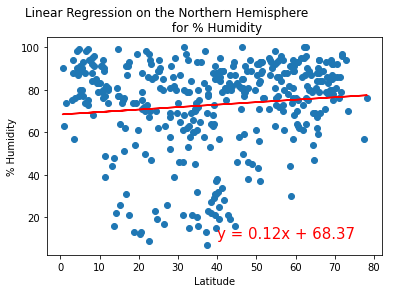

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        \n for % Humidity', '% Humidity',(40,10))

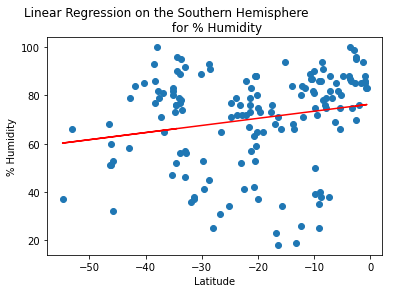

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        \n for % Humidity', '% Humidity',(-55,10))

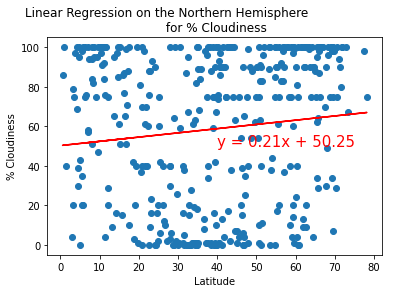

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        \n for % Cloudiness', '% Cloudiness',(40,50))

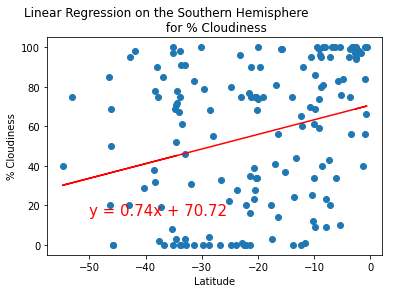

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        \n for % Cloudiness', '% Cloudiness',(-50,15))

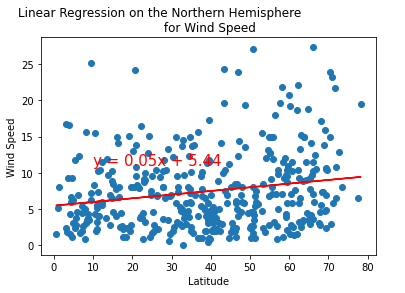

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        \n for Wind Speed', 'Wind Speed',(10,11))

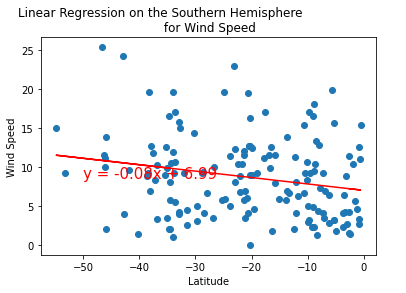

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        \n for Wind Speed', 'Wind Speed',(-50,8.5))